# Indeed job listing data - Exploratory Data Analysis (EDA) 

In [1]:
# Install necessary packages 
#!pip install missingno
#!pip install wordcloud

In [2]:
# Import necessary packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import re

%matplotlib inline

## Load the data
Import the data scraped using scraper-countries.py (Sept 20-21 2024), for the following countries: USA, Sweden, France, and Italy. These datasets contain the job listings for the 3 largest cities in respective country, for the job titles _Data Scientist_, _Data Analyst_, _Product Analyst_, and _BI Analyst_.

In [3]:
# Import csv files with scraped data for resp. country 
# Sweden 
df_SWE = pd.read_csv('output/indeed_jobs_Sweden.csv')
# France 
df_FRA = pd.read_csv('output/indeed_jobs_France.csv')
# Italy
df_ITA = pd.read_csv('output/indeed_jobs_Italy.csv')

In [4]:
# USA 
def merge_cities(cities):
    df_NY = pd.read_csv(f'{'output/indeed_jobs_USA_'}{cities[0]}{'.csv'}')
    # df_NY has no country column, add it manually to match the format of the other US cities
    df_NY['country'] = 'USA'
    df_LA = pd.read_csv(f'{'output/indeed_jobs_USA_'}{cities[1]}{'.csv'}')
    df_CHI = pd.read_csv(f'{'output/indeed_jobs_USA_'}{cities[2]}{'.csv'}')
    # Make sure order of columns is the same as for LA and Chicago
    desired_order = df_LA.columns.tolist()
    print('Order of columns: ', desired_order)
    df_NY = df_NY[desired_order]
    # Concactenate rows for US cities 
    df_USA = pd.concat([df_NY, df_LA, df_CHI], ignore_index=True)
    # Verify that it worked 
    df_USA.columns.tolist()==desired_order
    return(df_USA)

df_USA = merge_cities(['NY', 'LA', 'CHI'])

Order of columns:  ['page', 'country', 'job_link', 'search_keyword', 'search_location', 'job_title', 'company_name', 'company_location', 'salary', 'job_description']


## Initial inspection of the data

In [5]:
df_SWE.head(5)
#df_SWE.tail(5)

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,Sweden,https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...,Data+Analyst,Stockholm,Data Analyst (Data Visualization),Swedium Global Services,Distansjobb in Stockholm,Not available,Data Analyst (Data Visualization) \n \n Swediu...
1,1,Sweden,https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...,Data+Analyst,Stockholm,Data Analyst,Deploja AB,169 73 Solna,Not available,Role: \n \n Website Performance: Web analyst f...
2,1,Sweden,https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...,Data+Analyst,Stockholm,Data Analyst,Cubane Solutions AB,Stockholm,Heltid,Responsibilities \n \n Website Performance: W...
3,1,Sweden,https://se.indeed.com/rc/clk?jk=265b21402a8391...,Data+Analyst,Stockholm,Data Analyst,Sobi,Stockholm,Heltid,Company Description \n Statistics show that w...
4,1,Sweden,https://se.indeed.com/rc/clk?jk=65bfa8c313624f...,Data+Analyst,Stockholm,"Juniora Analysts till Operations, Engineering,...",Deloitte,113 57 Stockholm,Heltid,Företagsbeskrivning \n \n \n Deloitte är en g...


In [6]:
df_FRA.head(5)

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,France,https://www.indeed.fr/rc/clk?jk=3163cc1d8a51ee...,Data+Analyst,Paris (75),CDI - Data analyst KYC - Senior F/H,La Banque Postale,Paris (75),CDI,INTRODUCTION \n Au sein de la direction Data ...
1,1,France,https://www.indeed.fr/rc/clk?jk=71fa252714d41c...,Data+Analyst,Paris (75),Data Analyst F/H,IZI Solutions Durables,Télétravail partiel à La Défense (92),CDI,"À propos \n \n En 2019, le Groupe EDF veut re..."
2,1,France,https://www.indeed.fr/rc/clk?jk=21f25c16a32522...,Data+Analyst,Paris (75),Data analyst,Le Groupe La Poste,Issy-les-Moulineaux (92),CDI,"La Poste Groupe change, nos métiers évoluent. ..."
3,1,France,https://www.indeed.fr/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,Paris (75),Data Analyst H/F,GROUPE ID SEARCH,Paris (75),"À partir de 35 000 € par an - CDI, Temps plein","Tertialis, société du groupe ID SEARCH, est sp..."
4,1,France,https://www.indeed.fr/rc/clk?jk=8c5cc311877c09...,Data+Analyst,Paris (75),Consultant Débutant Data Analyst en CDI - Pari...,EY,92037 La Défense,CDI,Participer à la digitalisation de nos clients ...


In [7]:
df_ITA.head(5)

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",Business Intelligence (Power BI) - Python- Bus...,Area IT Group,"Roma, Lazio",25.000 € - 40.000 € all'anno,Ricerchiamo Sviluppatori in almeno uno dei seg...
1,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",Power Bi Analyst,Verisure Italy,00144 Roma,Not available,Ti piacerebbe far parte della multinazionale d...
2,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",IT Project Management Internship,Procter & Gamble,"Roma, Lazio",Not available,Job Location Rome Job Description INFORMATI...
3,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",Credit & Collection Data Analyst,Verisure Italy S R L,00144 Roma,Not available,Ti piacerebbe far parte della multinazionale d...
4,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",Aeronautical System Analyst,adecco,"Roma, Lazio",Not available,Per azienda leader a livello globale nella ges...


In [8]:
df_USA.head(5)

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,USA,https://www.indeed.com/rc/clk?jk=5bf7eb172149d...,Data+Analyst,"New+York, NY",Business Analyst (Data products),Aon,"Remote in New York, NY","$80,000 - $95,000 a year - Full-time","Senior Associate Consultant, Data Solutions ..."
1,1,USA,https://www.indeed.com/rc/clk?jk=6b99bd10f1316...,Data+Analyst,"New+York, NY",Data Analyst,NYU Langone,"New York, NY",$32.38 - $39.01 an hour - Temporary,NYU Grossman School of Medicine is one of the...
2,1,USA,https://www.indeed.com/rc/clk?jk=d70c515431fa2...,Data+Analyst,"New+York, NY",Data Analyst,NYU Langone Health,"New York, NY 10016","$67,771.14 - $75,000.00 a year - Full-time",NYU Grossman School of Medicine is one of the...
3,1,USA,https://www.indeed.com/rc/clk?jk=3aa26222eadd6...,Data+Analyst,"New+York, NY","Resy Marketing Data Analyst, Data and Analytics",Amex,"Hybrid work in New York, NY","$60,000 - $110,000 a year",You Lead the Way. We’ve Got Your Back. \n With...
4,1,USA,https://www.indeed.com/rc/clk?jk=3aa564ce173c8...,Data+Analyst,"New+York, NY",2025 University Graduate - Digital Strategy An...,Adobe,"New York, NY 10012","$53,900 - $101,450 a year - Full-time",Our Company Changing the world through digit...


### Check dimensions and data types

In [9]:
# Check dimensions of dfs 
print(f'SWE \t   columns: {df_SWE.shape[1]} \t  rows: {df_SWE.shape[0]}')
print(f'FRA \t   columns: {df_FRA.shape[1]} \t  rows: {df_FRA.shape[0]}')
print(f'ITA \t   columns: {df_ITA.shape[1]} \t  rows: {df_ITA.shape[0]}')
print(f'USA \t   columns: {df_USA.shape[1]} \t  rows: {df_USA.shape[0]}')

SWE 	   columns: 10 	  rows: 320
FRA 	   columns: 10 	  rows: 2200
ITA 	   columns: 10 	  rows: 769
USA 	   columns: 10 	  rows: 1317


In [10]:
# Check data types
df_SWE.info() 
# Most columns are of type 'Dtype object'
# Convert columns with strings only to string data type to optimize performance
# Mixed columns with both numbers and strings: company_location, salary, job_link (url) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page              320 non-null    int64 
 1   country           320 non-null    object
 2   job_link          320 non-null    object
 3   search_keyword    320 non-null    object
 4   search_location   320 non-null    object
 5   job_title         320 non-null    object
 6   company_name      320 non-null    object
 7   company_location  320 non-null    object
 8   salary            320 non-null    object
 9   job_description   320 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


In [11]:
# Dictionary specifying column names and desired data types
dtype_dict = {
    'page': 'int64',  
    'country': 'string', 
    'job_link': 'object', 
    'search_keyword': 'string', 
    'search_location': 'string', 
    'job_title': 'string', 
    'company_name': 'string', 
    'company_location': 'object', 
    'salary': 'object', 
    'job_description': 'string'
}

# Convert objects to strings 
df_SWE = df_SWE.astype(dtype_dict)

# Output new data types
print(df_SWE.dtypes) # Is string[python] not dtype string?

page                         int64
country             string[python]
job_link                    object
search_keyword      string[python]
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object


In [12]:
# Do the same for the other datasets 
df_FRA = df_FRA.astype(dtype_dict)
df_ITA = df_ITA.astype(dtype_dict)
df_USA = df_USA.astype(dtype_dict)

## Some descriptive statistics

In [13]:
# Describe (numerical) columns  
df_SWE.describe(include='all')

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
count,320.000000,320,320,320,320,320,320,320,320,320
unique,NaN,1,320,4,3,198,198,88,11,263
top,NaN,Sweden,https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...,Data+Scientist,Stockholm,Data Analyst,Volvo Group,Stockholm,Not available,Who is Infinitas Learning? \n For everyone who...
freq,NaN,320,1,144,225,22,9,87,183,4
mean,2.453125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.734128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def desc_categorical(data):
    # Get frequency counts for each categorical column
    string_columns = data.select_dtypes(include='string').drop(columns='job_description') # Skip job description! 
    # Get frequency counts for the categorical columns with mixed data types (strings and numbers)
    object_columns = data.select_dtypes(include='object').drop(columns='job_link')

    # Loop through the columns and print value counts
    for col in string_columns.columns:
        print(f'Value counts for column: {col}\n{string_columns[col].value_counts()}\n')
    for col in object_columns.columns:
        print(f'Value counts for column: {col}\n{object_columns[col].value_counts()}\n')

desc_categorical(df_SWE) 

Value counts for column: country
country
Sweden    320
Name: count, dtype: Int64

Value counts for column: search_keyword
search_keyword
Data+Scientist     144
Product+Analyst    100
BI+Analyst          41
Data+Analyst        35
Name: count, dtype: Int64

Value counts for column: search_location
search_location
Stockholm    225
Göteborg      72
Malmö         23
Name: count, dtype: Int64

Value counts for column: job_title
job_title
Data Analyst                                           22
Systemutvecklare                                       20
Data Scientist                                         15
Business Analyst                                       10
Senior Data Scientist                                   6
                                                       ..
Senior Logistics Analyst                                1
Senior PIM Consultant                                   1
Analyst Relations and Market Intelligence Manager       1
Senior Principal Product Analyst | Candy C

### Preliminary observations, Swedish job listings:
- __Most frequent job titles__: Data Analyst, systemutvecklare, Data Scientist.
- __Most frequent company__: Volvo Group. 
- __Salary ranges__: Few numerical values are provided.

In [15]:
df_FRA.describe(include='all')

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
count,2200.000000,2200,2200,2200,2200,2200,2200,2200,2200,2200
unique,NaN,1,2200,4,3,1213,718,256,165,1311
top,NaN,France,https://www.indeed.fr/rc/clk?jk=3163cc1d8a51ee...,Data+Analyst,Paris (75),Data Analyst H/F,AXA,Paris (75),Temps plein,Not available
freq,NaN,2200,1,757,1949,34,64,582,512,51
mean,17.454091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13.220097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
desc_categorical(df_FRA) 

Value counts for column: country
country
France    2200
Name: count, dtype: Int64

Value counts for column: search_keyword
search_keyword
Data+Analyst       757
Product+Analyst    662
BI+Analyst         463
Data+Scientist     318
Name: count, dtype: Int64

Value counts for column: search_location
search_location
Paris (75)        1949
Lyon (69)          210
Marseille (13)      41
Name: count, dtype: Int64

Value counts for column: job_title
job_title
Data Analyst H/F                                                   34
Data Analyst                                                       19
Data Analyst (F/H)                                                 18
Data Analyst Intern                                                17
Senior Product Data Analyst                                        13
                                                                   ..
Treasury Senior Analyst - Expert                                    1
Ingénieur systèmes Windows - secteur de l'assurance H/F

### Preliminary observations, French job listings:
- Many listings compared to Sweden. 
- __Most frequent job titles__: Data Analyst H/F (many similar names for this title, e.g. Data Analyst, Data Analyst F/H). 
- __Most frequently mentioned company__: AXA.
- __Company location__: Includes some information about télétravail (especially common in Paris).  
- __Salary ranges__: Need to split column to be able to draw any conclusions.

In [17]:
df_ITA.describe(include='all')

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
count,769.000000,769,769,769,769,769,769,769,769,769
unique,NaN,1,769,4,3,469,309,96,15,554
top,NaN,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Milano, Lombardia",Data Scientist,BIP - Business Integration Partners,"Milano, Lombardia",Not available,Company: TELEPASS ASSICURA\n \n \n \n \n ...
freq,NaN,769,1,419,540,32,39,207,746,5
mean,5.954486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.317205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
desc_categorical(df_ITA) 

Value counts for column: country
country
Italy    769
Name: count, dtype: Int64

Value counts for column: search_keyword
search_keyword
Data+Analyst       419
Data+Scientist     170
Product+Analyst     90
BI+Analyst          90
Name: count, dtype: Int64

Value counts for column: search_location
search_location
Milano, Lombardia    540
Roma, Lazio          203
Napoli, Campania      26
Name: count, dtype: Int64

Value counts for column: job_title
job_title
Data Scientist                                              32
Data Analyst                                                23
Business Analyst                                            14
Senior Data Analyst                                         10
Pricing Analyst                                              5
                                                            ..
BUSINESS ANALYST - BI                                        1
BI Analyst                                                   1
Process Analyst                      

### Preliminary observations, Italian job listings:
- Many listings compared to Sweden, but less than France.
- __Most frequent job titles__: Data Analyst, Data Scientist, Product Analyst. 
- __Most frequently mentioned company__: BIP - Business Integration Partners. 
- __Company location__: Milano. Also remote in Milano is relatively common (as is Rome).
- __Salary ranges__: Few numerical entries provided. 

In [19]:
df_USA.describe(include='all')

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
count,1317.000000,1317,1317,1317,1317,1317,1317,1317,1317,1317
unique,NaN,1,1317,4,3,739,470,185,525,823
top,NaN,USA,https://www.indeed.com/rc/clk?jk=5bf7eb172149d...,Data+Analyst,"New+York, NY",Data Analyst,Citi,"New York, NY",Full-time,"Guy Carpenter & Company, LLC is seeking candid..."
freq,NaN,1317,1,522,771,29,44,269,236,6
mean,6.425968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.684258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
desc_categorical(df_USA) 

Value counts for column: country
country
USA    1317
Name: count, dtype: Int64

Value counts for column: search_keyword
search_keyword
Data+Analyst       522
Data+Scientist     396
BI+Analyst         315
Product+Analyst     84
Name: count, dtype: Int64

Value counts for column: search_location
search_location
New+York, NY       771
Chicago, IL        444
Los+Angeles, CA    102
Name: count, dtype: Int64

Value counts for column: job_title
job_title
Data Analyst                                                  29
Business Analyst                                              25
Senior Business Analyst                                       19
Senior Machine Learning Engineer                              13
Senior Data Analyst                                           11
                                                              ..
Analyst - Innovation and Solutions III                         1
Analyst, Commerce                                              1
Product Owner – Digital Medi

### Preliminary observations, American job listings:
- Number of listings are less than for France. 
- __Most frequent job titles__: Data Analyst, Data Scientist, BI analyst. 
- __Most frequently mentioned company__: Citi. 
- __Company location__: New York.  
- __Salary ranges__: Need to split column to draw conclusions. 

### Conclusions
- The following columns needs to be cleaned: search_keyword, job_title, job_description, company_location.   
- The salary column should be split into two columns (separate numeric vs string content).    
- Job titles appear to vary somewhat between countries (since top 3 ones were different for different countries). 


## Data reduction and data cleaning
Handle missing and duplicate data entries. Remove unnecessary columns (if any). 
Clean and preprocess the data to handle anomalies and outliers. 

### Missing values

In [21]:
# Handle missing values 
# The scraper labels cells as 'Not available' when there is no value. Change these to NaN. 
# Replace 'Not available' with NaN
df_SWE.replace('Not available', np.NaN, inplace=True)
df_FRA.replace('Not available', np.NaN, inplace=True) 
df_ITA.replace('Not available', np.NaN, inplace=True)
df_USA.replace('Not available', np.NaN, inplace=True)

df_FRA.isnull().sum() # Missing salary and job description entries 
df_SWE.isnull().sum() # Missing salary entries 
df_ITA.isnull().sum() # Missing salary entries 
df_USA.isnull().sum() # Missing salary entries 

# Also calculate percentage of missing values
df_FRA.isnull().mean() * 100

# Salary entries will be handled later when columns are split 
# For now we do not drop these rows (we are not primarily interested in salaries)

page                 0.000000
country              0.000000
job_link             0.000000
search_keyword       0.000000
search_location      0.000000
job_title            0.000000
company_name         0.000000
company_location     0.000000
salary              17.181818
job_description      2.318182
dtype: float64

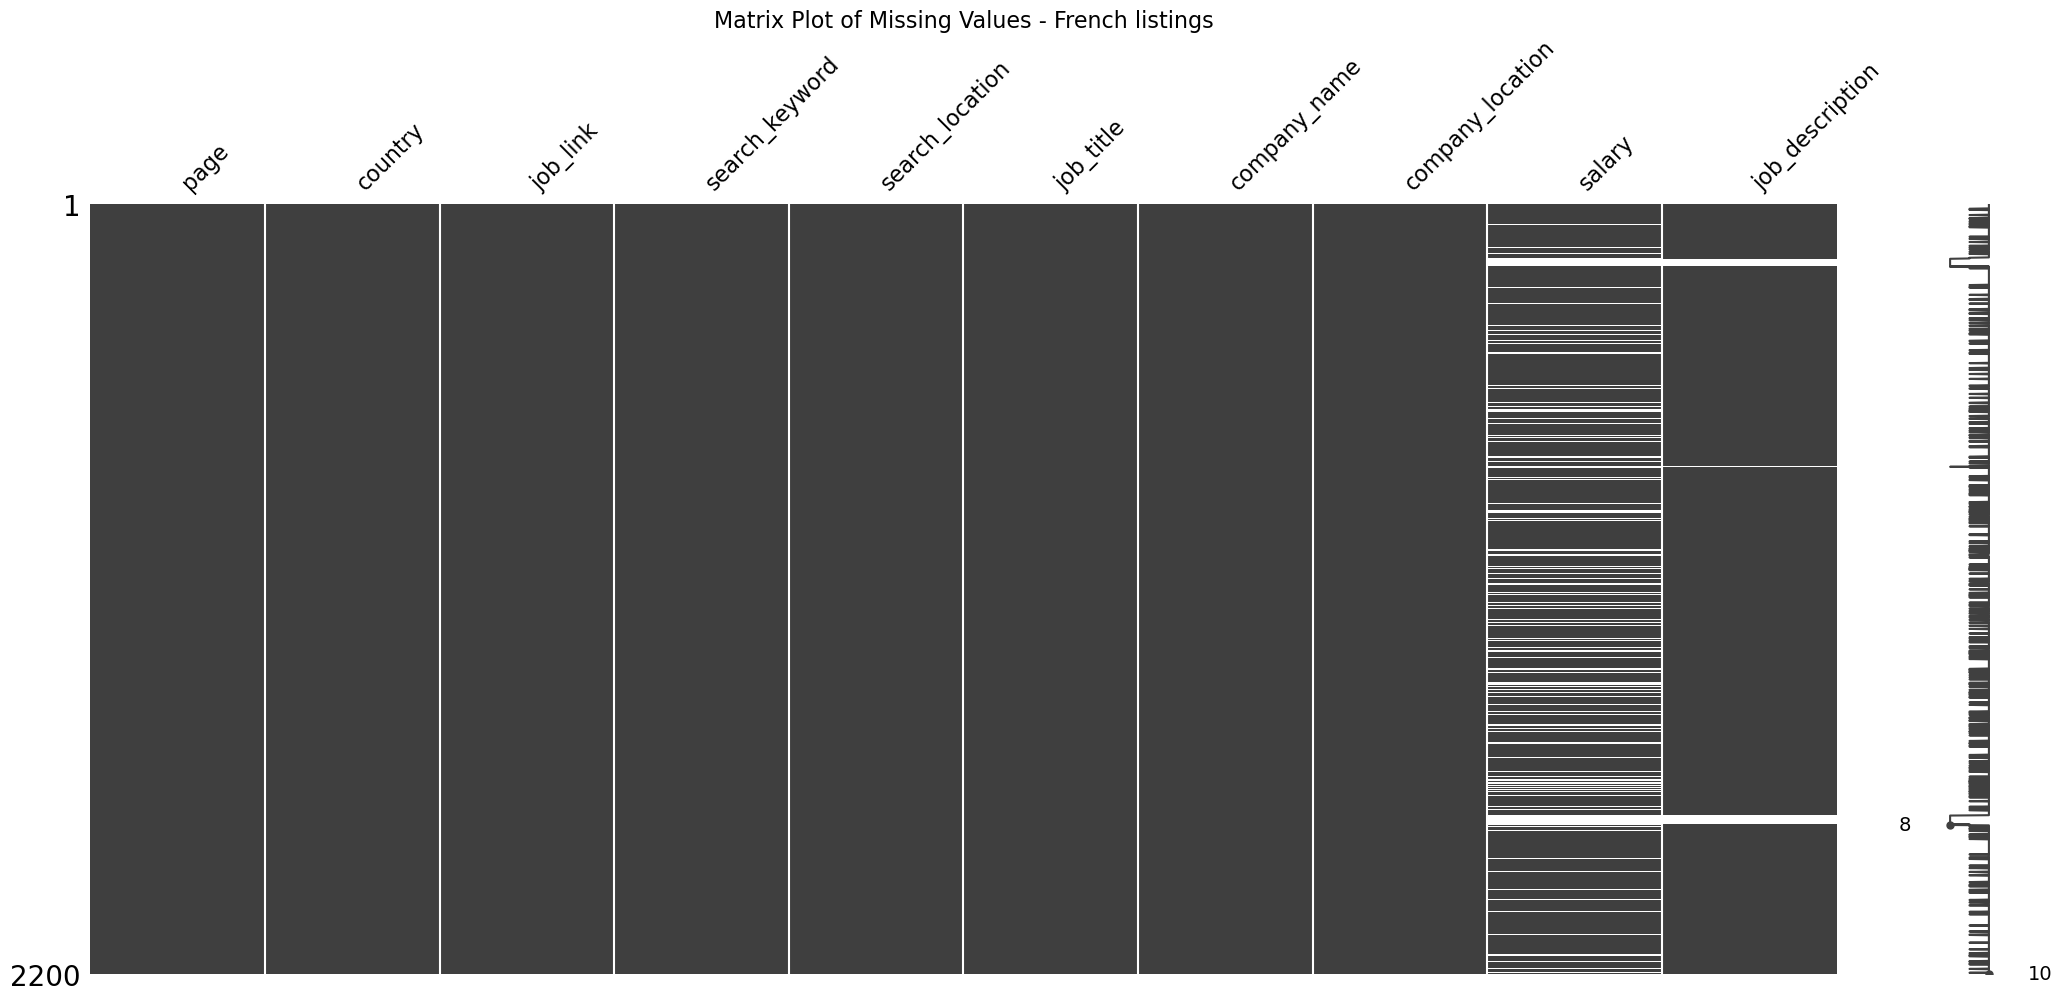

In [22]:
# Visualize missing data patterns using missingno
msno.matrix(df_FRA) #.sample(250)
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16)  # Add a title to the plot
plt.show()

In [23]:
# Look into the missing descriptions for French job listings (seems that request was blocked)
print(df_FRA.isnull().sum())
#df_FRA[df_FRA['job_description'].isnull()]

# Manual imports of missing job descriptions from URLs 
df_FRA_missing = pd.read_csv('df_FRA_missing_data.csv')

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64


In [24]:
# Merge the DataFrames based on the 'job_link' column
merged_df = pd.merge(df_FRA, df_FRA_missing, on=['job_link'])
merged_df = pd.merge(df_FRA, df_FRA_missing[['job_link', 'job_description_new']], on='job_link', how='left')
# Save the job description as only one column (based on when it is not NaN)
merged_df['job_description'] = merged_df['job_description'].combine_first(merged_df['job_description_new'])
merged_df.drop('job_description_new', axis=1, inplace=True)
# Verify that there are no missing values in job_description now
merged_df

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,France,https://www.indeed.fr/rc/clk?jk=3163cc1d8a51ee...,Data+Analyst,Paris (75),CDI - Data analyst KYC - Senior F/H,La Banque Postale,Paris (75),CDI,INTRODUCTION \n Au sein de la direction Data ...
1,1,France,https://www.indeed.fr/rc/clk?jk=71fa252714d41c...,Data+Analyst,Paris (75),Data Analyst F/H,IZI Solutions Durables,Télétravail partiel à La Défense (92),CDI,"À propos \n \n En 2019, le Groupe EDF veut re..."
2,1,France,https://www.indeed.fr/rc/clk?jk=21f25c16a32522...,Data+Analyst,Paris (75),Data analyst,Le Groupe La Poste,Issy-les-Moulineaux (92),CDI,"La Poste Groupe change, nos métiers évoluent. ..."
3,1,France,https://www.indeed.fr/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,Paris (75),Data Analyst H/F,GROUPE ID SEARCH,Paris (75),"À partir de 35 000 € par an - CDI, Temps plein","Tertialis, société du groupe ID SEARCH, est sp..."
4,1,France,https://www.indeed.fr/rc/clk?jk=8c5cc311877c09...,Data+Analyst,Paris (75),Consultant Débutant Data Analyst en CDI - Pari...,EY,92037 La Défense,CDI,Participer à la digitalisation de nos clients ...
...,...,...,...,...,...,...,...,...,...,...
2195,3,France,https://www.indeed.fr/rc/clk?jk=e140c6dba19957...,BI+Analyst,Lyon (69),COMMERCIAL PERFORMANCE DATA OWNER H/F,Groupe Seb,Écully (69),NaN,Minimum annual compensation (individual bonuse...
2196,4,France,https://www.indeed.fr/rc/clk?jk=02f3391fc923b2...,BI+Analyst,Lyon (69),Consultant en Gestion et Gouvernance de l'info...,Eowin,Lyon (69),"CDI, Temps plein",Fort de plus de 30 ans d’expérience dans la ge...
2197,4,France,https://www.indeed.fr/rc/clk?jk=9761f99e5e5999...,BI+Analyst,Lyon (69),DevOps (H/F),Askills,Lyon (69),"CDI, Temps plein",Askills est un jeune cabinet de conseil lyonna...
2198,4,France,https://www.indeed.fr/rc/clk?jk=76d98e1171c985...,BI+Analyst,Lyon (69),Tech Lead H/F,Sogeti,Lyon (69),CDI,Description de l'entreprise \n \n \n SOGETI c'...


In [25]:
merged_df.isnull().sum()
df_FRA = merged_df

In [26]:
print(df_FRA.isnull().sum())

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description       0
dtype: int64


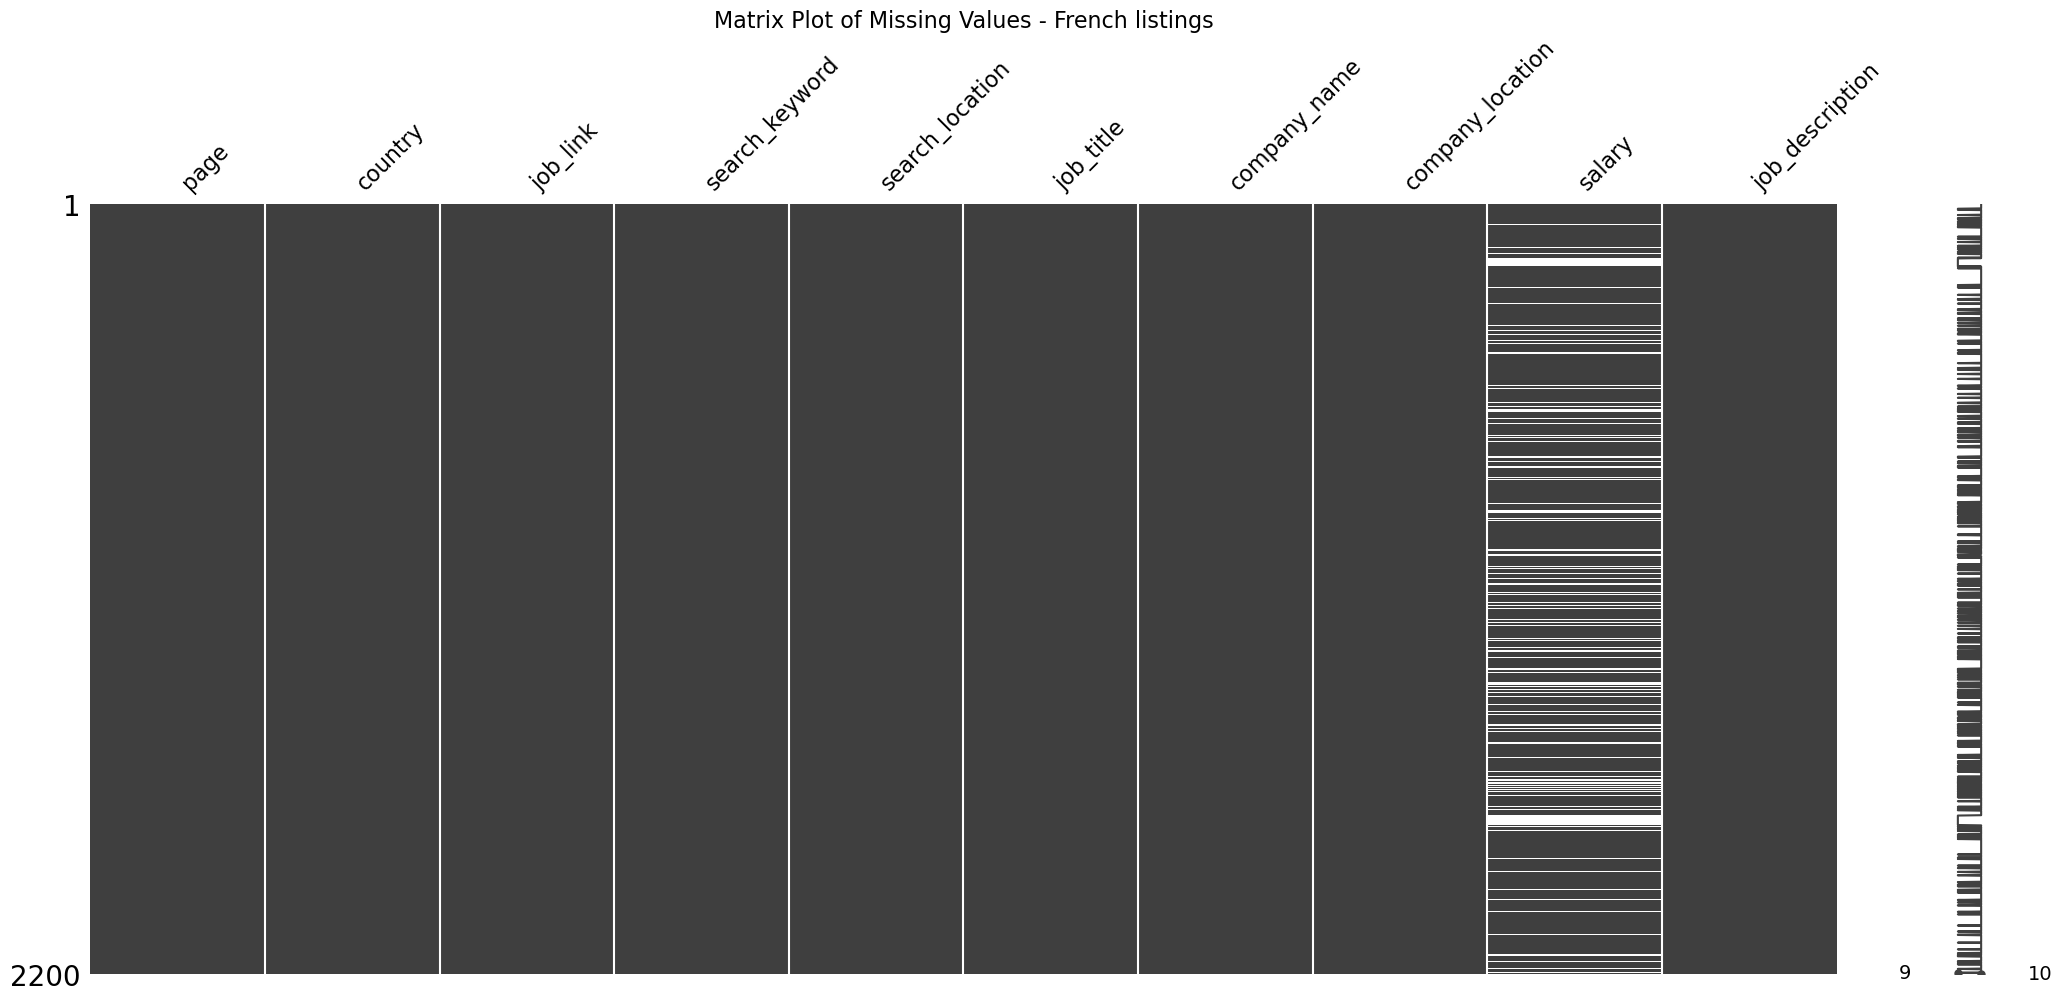

In [27]:
# Now the job_description should not have missing values anymore
msno.matrix(df_FRA) #.sample(250)
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16)  
plt.show()

In [28]:
df_FRA[df_FRA['salary'].isnull()]

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
13,1,France,https://www.indeed.fr/rc/clk?jk=deaa67e6674535...,Data+Analyst,Paris (75),Data Analyste pour Ubigi H/F,Transatel,Télétravail partiel à 92800 Puteaux,NaN,Transatel est un fournisseur mondial de soluti...
14,1,France,https://www.indeed.fr/rc/clk?jk=f0889f8fa3f283...,Data+Analyst,Paris (75),Data Analyst (F/H),Novencia,Paris (75),NaN,Carnet de route \n \n Novencia accompagne ses ...
16,2,France,https://www.indeed.fr/rc/clk?jk=deaa67e6674535...,Data+Analyst,Paris (75),Data Analyste pour Ubigi H/F,Transatel,Télétravail partiel à 92800 Puteaux,NaN,Transatel est un fournisseur mondial de soluti...
31,3,France,https://www.indeed.fr/rc/clk?jk=fd64421c261c1f...,Data+Analyst,Paris (75),Data-Analyst Audit- H/F/X,Société Générale,La Défense (92),NaN,Vos missions au quotidien \n \n \n Vous savez ...
40,3,France,https://www.indeed.fr/rc/clk?jk=4ad068c42c765d...,Data+Analyst,Paris (75),Global Market Data Analyst,URGO,Paris (75),NaN,Paris\n \n \n \n \n \n \n \n \n \n \n \...
...,...,...,...,...,...,...,...,...,...,...
2164,1,France,https://www.indeed.fr/rc/clk?jk=03d3354cf0feb3...,BI+Analyst,Lyon (69),Global Business Process Analyst,Louis Dreyfus Company,Villeurbanne (69),NaN,Company Description\n \n \n \n Louis Dreyf...
2169,2,France,https://www.indeed.fr/rc/clk?jk=627eb7b9017ddf...,BI+Analyst,Lyon (69),Data Analyst F/H,Visiativ,Télétravail partiel à 69002 Lyon,NaN,"Chez ABGi, filiale de Visiativ, nous avons la ..."
2171,2,France,https://www.indeed.fr/rc/clk?jk=5aab0c64b77111...,BI+Analyst,Lyon (69),Consultant Projet BI et Big Data (F/H),Novencia,Lyon (69),NaN,Carnet de route \n \n Chef de projet BI / Big ...
2184,3,France,https://www.indeed.fr/rc/clk?jk=2a3415f06aecdb...,BI+Analyst,Lyon (69),Consultant décisionnel BI (H/F),Insitoo,Lyon (69),NaN,"Basée à Lille, Lyon, Nantes, Grenoble et Bruxe..."


### Duplicates

In [29]:
# Check for potential duplicates 
# unique() prints the unique values, nunique() prints the number of unique values

def check_duplicates(data):
    # The number of rows should be equal to the number of unique job links, etc 
    # Get the number of rows 
    num_rows = data.shape[0]
    # Print the number of rows
    print(f'The DataFrame has {num_rows} rows.')
    print(data.nunique()) 
    # Check for duplicates in all columns
    duplicates = data.duplicated(keep=False)
    # Print duplicate rows 
    print(data[duplicates])

check_duplicates(df_FRA)

The DataFrame has 2200 rows.
page                  47
country                1
job_link            2200
search_keyword         4
search_location        3
job_title           1213
company_name         718
company_location     256
salary               164
job_description     1355
dtype: int64
Empty DataFrame
Columns: [page, country, job_link, search_keyword, search_location, job_title, company_name, company_location, salary, job_description]
Index: []


### Conclusion
There seem to be no issues with duplicated entries. 

In [30]:
df_FRA.isnull().sum()

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description       0
dtype: int64

In [36]:
# Format, clean, and fix columns 

# Salary conversion function to handle both thousand separators and decimal points
def convert_salary(value):
    # Converts salary strings with thousand separators or decimal points into a float.
    return float(value.replace('\xa0', '').replace(' ', '').replace(',', '').replace('.', '').replace('..', '.'))

def clean_columns(data):
    # Remove + signs and replace them with spaces in 'search_keyword' and 'search_location'
    data[['search_keyword', 'search_location']] = data[['search_keyword', 'search_location']].replace({r'\+': ' '}, regex=True)
    
    # Remove all newline characters from 'job_description'
    data['job_description'] = data['job_description'].replace({r'\n': ' '}, regex=True)
    
    # Extract salary numbers using regex
    # This regex captures numbers with commas, spaces, and periods, handling both American and European formats
    data['salary'] = data['salary'].astype(str)
    data['salary_num'] = data['salary'].apply(lambda x: re.findall(r'\d{1,3}(?:[,\s]\d{3})*(?:\.\d+)?', x))
    
    # Replace empty lists with NaN in 'salary_num'
    data['salary_num'] = data['salary_num'].apply(lambda x: x if x else np.nan)
    
    # Create 'salary_num_low' and 'salary_num_high' by extracting and cleaning the numbers
    # If there is only one number put it in both low and high column
    data['salary_num_low'] = data['salary_num'].apply(lambda x: convert_salary(x[0]) if isinstance(x, list) and len(x) > 0 else np.nan)
    data['salary_num_high'] = data['salary_num'].apply(lambda x: convert_salary(x[0]) if isinstance(x, list) and len(x) == 1 else convert_salary(x[1]) if isinstance(x, list) and len(x) > 1 else np.nan)

    # Extract time period from 'salary' column using regex
    # par an since 'an' is an English word 
    data['time_period'] = data['salary'].str.extract(r'(hour|year|month|week|day|ora|anno|mese|settimana|giorno|heure|par an|mois|semaine|jour|månad)')

    return data

# Apply the function to clean the dataframe
df_clean = clean_columns(df_FRA) 

# Inspect output 
print(df_clean.isnull().sum())

# Check salary ranges 
df_clean.describe()

# Filter out data when column 'salary_num' is not NaN
df_filtered = df_clean.dropna(subset=['salary_num'])

df_filtered

#desc_categorical(df_filtered) 

page                   0
country                0
job_link               0
search_keyword         0
search_location        0
job_title              0
company_name           0
company_location       0
salary                 0
job_description        0
salary_num          1909
salary_num_low      1909
salary_num_high     1909
time_period         1909
dtype: int64


,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description,salary_num,salary_num_low,salary_num_high,time_period
3,1,France,https://www.indeed.fr/pagead/clk?mo=r&ad=-6NYl...,Data Analyst,Paris (75),Data Analyst H/F,GROUPE ID SEARCH,Paris (75),"À partir de 35 000 € par an - CDI, Temps plein","Tertialis, société du groupe ID SEARCH, est sp...",[35 000],35000.0,35000.0,par an
5,1,France,https://www.indeed.fr/rc/clk?jk=68310974a6c92a...,Data Analyst,Paris (75),Data Analyst H/F,URMET FRANCE,Télétravail partiel à 95700 Roissy-en-France,"45 000 € par an - CDI, Temps plein","URMET France, fabricant d’interphone, de solut...",[45 000],45000.0,45000.0,par an
9,1,France,https://www.indeed.fr/rc/clk?jk=ea244c62a6bcb5...,Data Analyst,Paris (75),Data Analyst H/F,Sofrilog,75009 Paris,"À partir de 45 000 € par an - CDI, Temps plein","SOFRILOG est un Groupe familial, numéro 2 du m...",[45 000],45000.0,45000.0,par an
12,1,France,https://www.indeed.fr/rc/clk?jk=468ec6f18c88c8...,Data Analyst,Paris (75),Data Analyst - Optimisation de Tournées H/F,TRUSK FRANCE,93400 Saint-Ouen,De 36 000 € à 40 000 € par an - CDI,TRUSK est l’acteur national INCONTOURNABLE du...,"[36 000, 40 000]",36000.0,40000.0,par an
15,2,France,https://www.indeed.fr/rc/clk?jk=8a827ea3e37c59...,Data Analyst,Paris (75),Alternance - Assistant Data Analyst (H/F),CMI France,Télétravail partiel à 92300 Levallois-Perret,De 721 € à 1 747 € par mois - Alternance,"CMI Media, la régie publicitaire du groupe CMI...","[721, 1 747]",721.0,1747.0,mois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,2,France,https://www.indeed.fr/rc/clk?jk=983060c55f4f3c...,BI Analyst,Lyon (69),Analyste H/F,EVERGREEN GARDEN CARE FRANCE SAS,Télétravail partiel à 69760 Limonest,"À partir de 35 000 € par an - CDI, Temps plein",THE COMPANY Evergreen Garden Care is the lea...,[35 000],35000.0,35000.0,par an
2177,2,France,https://www.indeed.fr/rc/clk?jk=a4b17cf28e6b0d...,BI Analyst,Lyon (69),Web Analytics Consultant,Evolutive,Télétravail partiel à 69230 Saint-Genis-Laval,De 35 000 € à 45 000 € par an - Temps plein,Qui sommes nous ? Née à Lyon il y a presqu...,"[35 000, 45 000]",35000.0,45000.0,par an
2188,3,France,https://www.indeed.fr/rc/clk?jk=9a1e214f784783...,BI Analyst,Lyon (69),Consultant·e Chef·fe de projet F/H,Adod,Lyon 1er (69),"De 42 000 € à 48 000 € par an - CDI, Temps ...","Adod , recrute un·e consultant·e Chef·fe de p...","[42 000, 48 000]",42000.0,48000.0,par an
2190,3,France,https://www.indeed.fr/rc/clk?jk=8c6137414350ec...,BI Analyst,Lyon (69),MLOPS ENGINEER H/F,Askills,Lyon (69),"De 45 000 € à 55 000 € par an - CDI, Temps ...",Cabinet de conseil résolument tourné vers la D...,"[45 000, 55 000]",45000.0,55000.0,par an


In [38]:
# Check if any rows in the 'salary' column contain the word 'day'
has_weekly = df_USA['salary'].str.contains('a day', case=False, na=False).any()

# Output the result
if has_weekly:
    print("There are rows with 'a day' in the salary column.")
else:
    print("No rows with 'a day' in the salary column.")


There are rows with 'a day' in the salary column.


## Feature engineering 

In [39]:
df = pd.DataFrame()
df = df_clean

def convert_salary_to_monthly(row, salary_column):
    # Dictionary to map time periods (in different languages) to their monthly conversion factor
    time_period_map = {
        'hour': 160, 'ora': 160, 'heure': 160,
        'year': 1/12, 'anno': 1/12, 'par an': 1/12,
        'week': 4, 'settimana': 4, 'semaine': 4,
        'day': 20, 'giorno': 20, 'jour': 20,
        'month': 1, 'mese': 1, 'mois': 1, 'månad': 1
    }
    
    time_period = row['time_period']
    
    # Check if 'time_period' is a valid string and map it to conversion factor, otherwise return NaN
    if isinstance(time_period, str):
        time_period = time_period.lower()
        return row[salary_column] * time_period_map.get(time_period, np.nan)
    
    return np.nan

# Apply the function to convert salary_num_low to monthly salary
df['min_salary_month'] = df.apply(lambda row: convert_salary_to_monthly(row, 'salary_num_low'), axis=1)

# Apply the function to convert salary_num_high to monthly salary
df['max_salary_month'] = df.apply(lambda row: convert_salary_to_monthly(row, 'salary_num_high'), axis=1)

# need column that has currency info 

In [35]:
df

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description,salary_num,salary_num_low,salary_num_high,time_period,min_salary_month,max_salary_month
0,1,USA,https://www.indeed.com/rc/clk?jk=5bf7eb172149d...,Data Analyst,"New York, NY",Business Analyst (Data products),Aon,"Remote in New York, NY","$80,000 - $95,000 a year - Full-time","Senior Associate Consultant, Data Solutions ...","[80,000, 95,000]",80000.0,95000.0,year,6666.666667,7916.666667
1,1,USA,https://www.indeed.com/rc/clk?jk=6b99bd10f1316...,Data Analyst,"New York, NY",Data Analyst,NYU Langone,"New York, NY",$32.38 - $39.01 an hour - Temporary,NYU Grossman School of Medicine is one of the...,"[32.38, 39.01]",3238.0,3901.0,hour,518080.000000,624160.000000
2,1,USA,https://www.indeed.com/rc/clk?jk=d70c515431fa2...,Data Analyst,"New York, NY",Data Analyst,NYU Langone Health,"New York, NY 10016","$67,771.14 - $75,000.00 a year - Full-time",NYU Grossman School of Medicine is one of the...,"[67,771.14, 75,000.00]",6777114.0,7500000.0,year,564759.500000,625000.000000
3,1,USA,https://www.indeed.com/rc/clk?jk=3aa26222eadd6...,Data Analyst,"New York, NY","Resy Marketing Data Analyst, Data and Analytics",Amex,"Hybrid work in New York, NY","$60,000 - $110,000 a year",You Lead the Way. We’ve Got Your Back. With ...,"[60,000, 110,000]",60000.0,110000.0,year,5000.000000,9166.666667
4,1,USA,https://www.indeed.com/rc/clk?jk=3aa564ce173c8...,Data Analyst,"New York, NY",2025 University Graduate - Digital Strategy An...,Adobe,"New York, NY 10012","$53,900 - $101,450 a year - Full-time",Our Company Changing the world through digit...,"[53,900, 101,450]",53900.0,101450.0,year,4491.666667,8454.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,7,USA,https://www.indeed.com/rc/clk?jk=9c6fd220bf26f...,BI Analyst,"Chicago, IL",Healthcare Claims API/EDI Business Analyst (Lo...,RelMap Software,"Rosemont, IL","$70 - $80 an hour - Full-time, Contract",MUST BE LOCAL TO THE CHICAGO-AREA. IN-PERSON I...,"[70, 80]",70.0,80.0,hour,11200.000000,12800.000000
1313,7,USA,https://www.indeed.com/rc/clk?jk=4ca2131ead818...,BI Analyst,"Chicago, IL",eCommerce Analyst,Green Thumb,"Hybrid work in Chicago, IL",nan,The Role We are seeking a highly analytical ...,NaN,NaN,NaN,NaN,NaN,NaN
1314,7,USA,https://www.indeed.com/rc/clk?jk=558d0dbb26f8f...,BI Analyst,"Chicago, IL",Business Analyst,Allwyn North America,"Hybrid work in Chicago, IL 60606",Full-time,Who we are: Allwyn is a multi-national lotte...,NaN,NaN,NaN,NaN,NaN,NaN
1315,7,USA,https://www.indeed.com/rc/clk?jk=eb60bd8e996a0...,BI Analyst,"Chicago, IL","Senior Financial Analyst, North America Commer...",Flexport,"Hybrid work in Chicago, IL","$88,000 - $120,000 a year","About Flexport: At Flexport, we believe glob...","[88,000, 120,000]",88000.0,120000.0,year,7333.333333,10000.000000


In [ ]:
# Maybe add scraped date column? Good to keep

# Maybe good to assign a job id to a column, instead of checking for unique URLs 

# keyword count? 

# merge all of the countries to be able to compare all data. 

# interview procedures? 

# merge and add country column 

## Univariate analysis 


In [ ]:
# simplest is for payment 

# histograms

# simple word clouds 

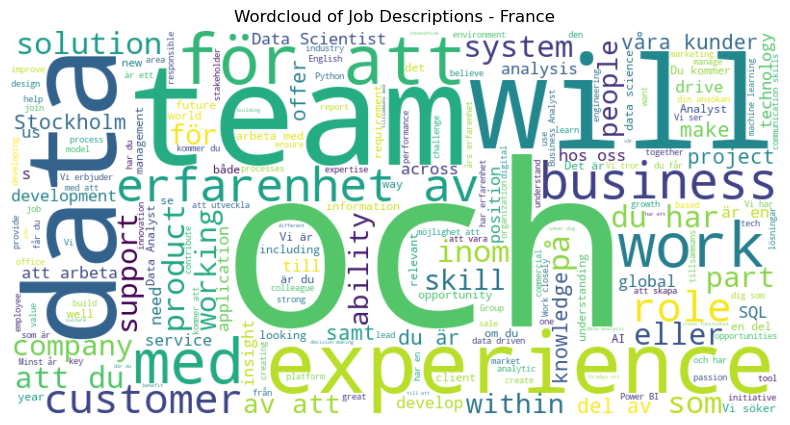

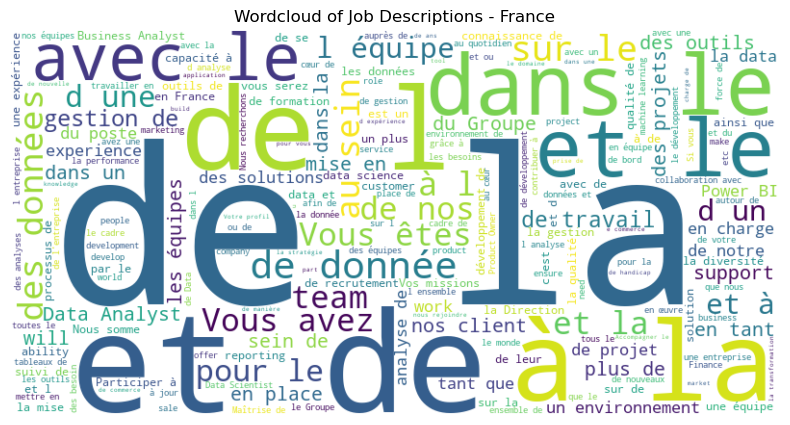

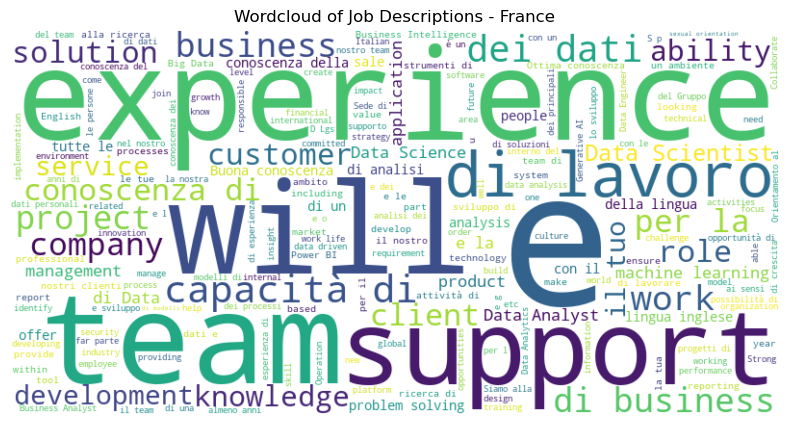

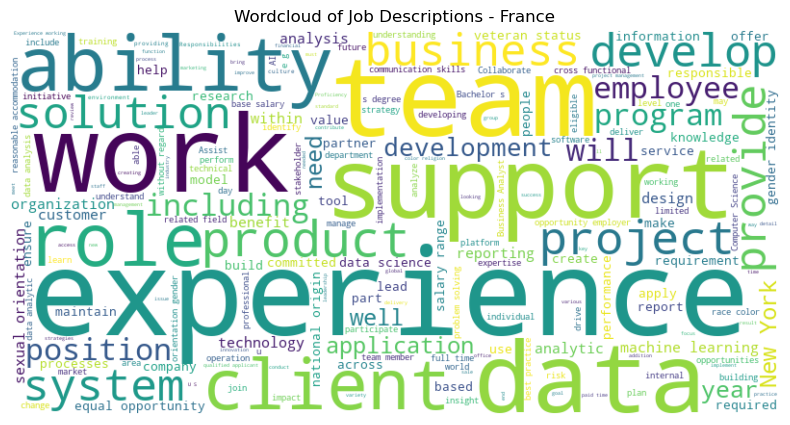

In [52]:
# Word cloud visualizations
def plt_wordtree(data, country):
    df = data['job_description']
    country = 'France'
    # Combine all the text into a single string 
    text = ' '.join(df.values)
    # Create a wordcloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Display the wordcloud 
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Wordcloud of Job Descriptions - {country}')
    plt.axis('off')
    plt.show()

plt_wordtree(df_SWE, 'Sweden')
plt_wordtree(df_FRA, 'France')
plt_wordtree(df_ITA, 'Italy')
plt_wordtree(df_USA, 'USA')

The job_description column needs to be cleaned to extract important keywords related to the job, instead of 'de, la, le, dans' etc. 

## Bivariate analysis 

In [ ]:
# Box plots help visualize the distribution of salary ranges across different categories (e.g., job titles, countries).


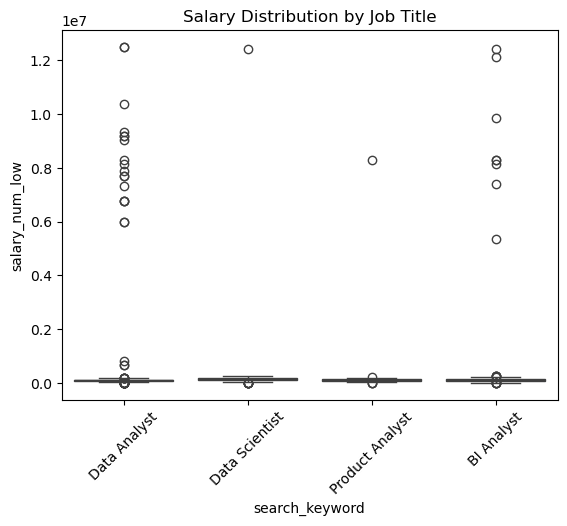

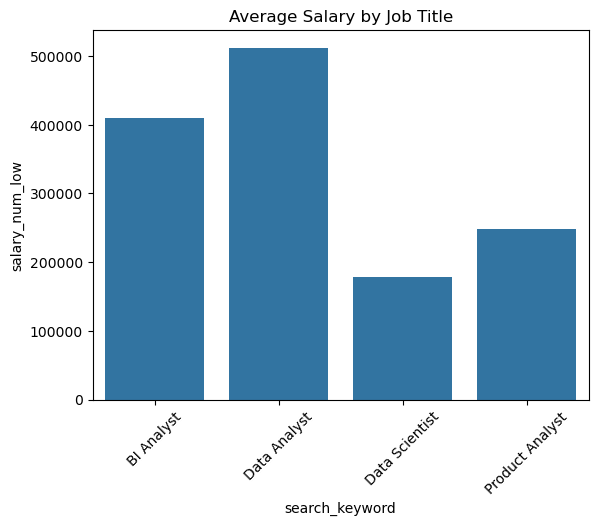

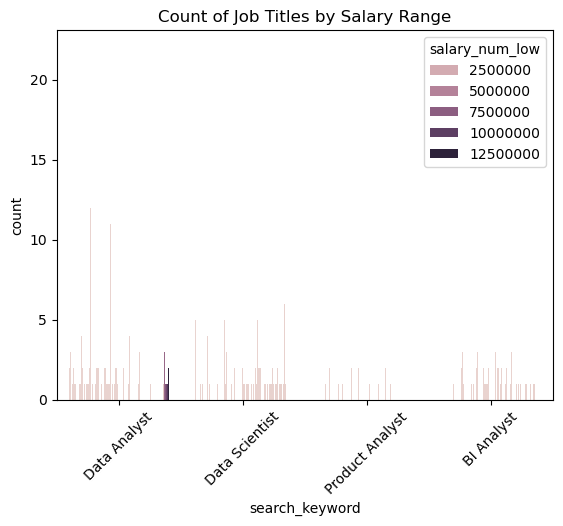

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_clean, x='search_keyword', y='salary_num_low')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Title')
plt.show()

mean_salary = df_clean.groupby('search_keyword')['salary_num_low'].mean().reset_index()
sns.barplot(data=mean_salary, x='search_keyword', y='salary_num_low')
plt.xticks(rotation=45)
plt.title('Average Salary by Job Title')
plt.show()

sns.countplot(data=df_clean, x='search_keyword', hue='salary_num_low')
plt.xticks(rotation=45)
plt.title('Count of Job Titles by Salary Range')
plt.show()

In [63]:

import scipy.stats as stats

salary_ranges = pd.cut(df_clean['salary_num_low'], bins=[0, 20000, 40000, 60000, 80000, 100000], labels=['<20k', '20-40k', '40-60k', '60-80k', '80-100k'])
crosstab = pd.crosstab(df_clean['search_keyword'], salary_ranges)
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 24.345613102280574, p-value: 0.018247045454143983


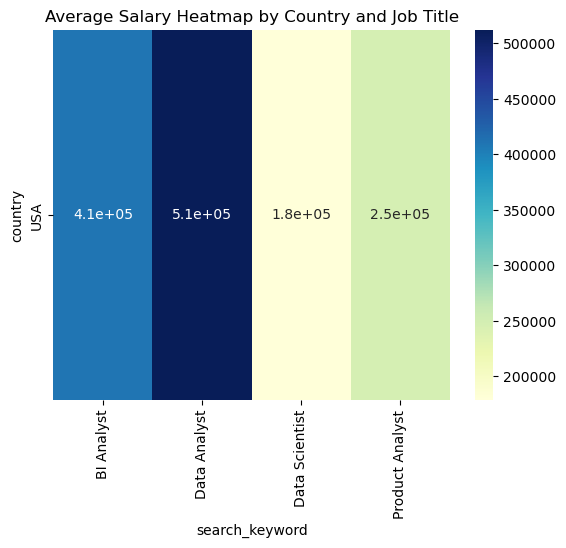

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


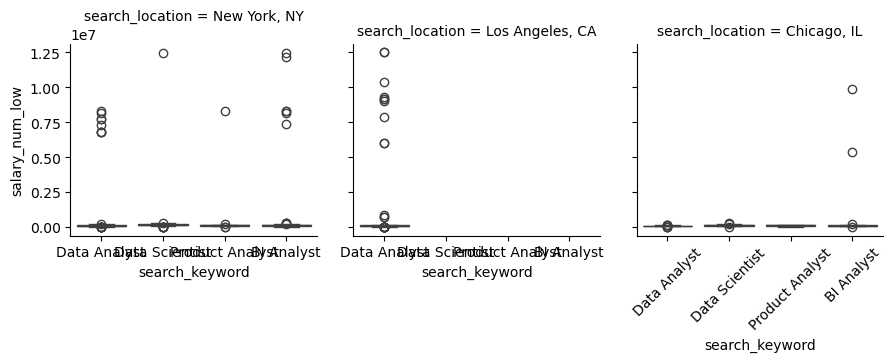

In [66]:
pivot_table = df_clean.pivot_table(values='salary_num_low', index='country', columns='search_keyword', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Average Salary Heatmap by Country and Job Title')
plt.show()

'''
g = sns.FacetGrid(df_clean, col='search_location', col_wrap=3)
g.map(sns.boxplot, 'search_keyword', 'salary_num_low')
plt.xticks(rotation=45)
plt.show()
'''

## Conclusions 
TBA.
Also interesting to look into 'Recruitment process' and 'Interview' process since there is data about that in the dataset?